# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 Building a strong recommendation system will help keep users engaged on the platform, expand their personal library with newly discovered and relevant songs, and help identify user tastes, preferences, and other latent features.

### **The objective:**

 The intended goal is to create a strong recommendation system that succeeds in recommending relevant songs.

### **The key questions:**

What is the best model or architecture for building a strong recommendation system? How could these models be used in conjunction? What other data would be helpful in improving a model? What are the relevant hyperparameters, and why?

### **The problem formulation**:

For this music recommendation system we are trying to determine multiple key points 

  1. Similarity in terms of users-users

  2. Similarity in terms of items-items

  3. Computing user-item similarities

  4. Grouping similar users and items into respective clusters/co-clusters

  5. Processing latent features

  6. Analyzing text

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

**count_data**

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from collections import defaultdict

from sklearn.metrics import mean_squared_error

### **Loading the dataset**

In [3]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/ADSP/count_data.csv')
count_df.drop(columns = 'Unnamed: 0',axis = 1, inplace = True)

song_df = pd.read_csv('/content/drive/MyDrive/ADSP/song_data.csv')

### **Understanding the data by viewing a few observations**

In [4]:
count_df.head(10)

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [6]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     object
 1   song_id     object
 2   play_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [7]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


Our relevant datasets are split into 2 sets which we will need to combine. Our "count_df" contains our necessary user_id, and play_count (which will serve as our measure of popularity). Our "song_df" contains the corresponding song titles, album name, artist names, and year (which could be useful for tracking song popularities over time). All columns in both datasets are objects with the exception of play_count & year.

In [8]:
# Left merging the count_df and song_df data on "song_id". Dropping duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on = 'song_id', how = 'left')

df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


user_id and song_id are encrypted. We will encode these 2 features so they are more easy to manipulate and identify later on.

In [9]:
# Applying label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

In [10]:
lab_enc = LabelEncoder()
df['user_id'] = lab_enc.fit_transform(df['user_id'])
df['song_id'] = lab_enc.fit_transform(df['song_id'])

**To allow us to train and process our models more quickly we will exclude some users/items from the list to allow for a recommendation system that avoids loops and can provide novel recommendations.**

In [11]:
# Getting the column containing the users
users = df.user_id
# Creating a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [12]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [13]:
# Getting the column containing the songs
songs = df.song_id
# Creating a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [14]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [15]:
# Dropping records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [16]:
df_final.shape

(117876, 7)

In [17]:
df_final.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
206,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
209,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
213,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
216,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [18]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [19]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [20]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

Our dataframe contains 3155 unique users, 563 unique songs, and 232 unique artists.

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [21]:
df_final['song_id'].value_counts().sort_values(ascending = False)[:10]

8582    751
352     748
2220    713
1118    662
4152    652
5531    618
4448    609
6189    606
6293    583
1334    570
Name: song_id, dtype: int64

Most interacted users

In [22]:
df_final['user_id'].value_counts().sort_values(ascending = False)[:10]

61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
26616    175
9097     175
43041    174
65994    171
Name: user_id, dtype: int64

Our most popular song is song_id 8582 which appears 751 times in our dataframe (this does not factor in play counts). User_id 61472 has listened to 243 different songs (this does not factor in play counts).

Songs played in a year

In [23]:
# Finding out the number of songs played in a year
df_final.groupby(['year']).count()

,user_id,song_id,play_count,title,release,artist_name
year,,,,,,
0,20649,20649,20649,20649,20649,20649
1969,238,238,238,238,238,238
1970,109,109,109,109,109,109
1971,133,133,133,133,133,133
1973,270,270,270,270,270,270
1974,583,583,583,583,583,583
1975,173,173,173,173,173,173
1976,478,478,478,478,478,478
1978,119,119,119,119,119,119


In [24]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

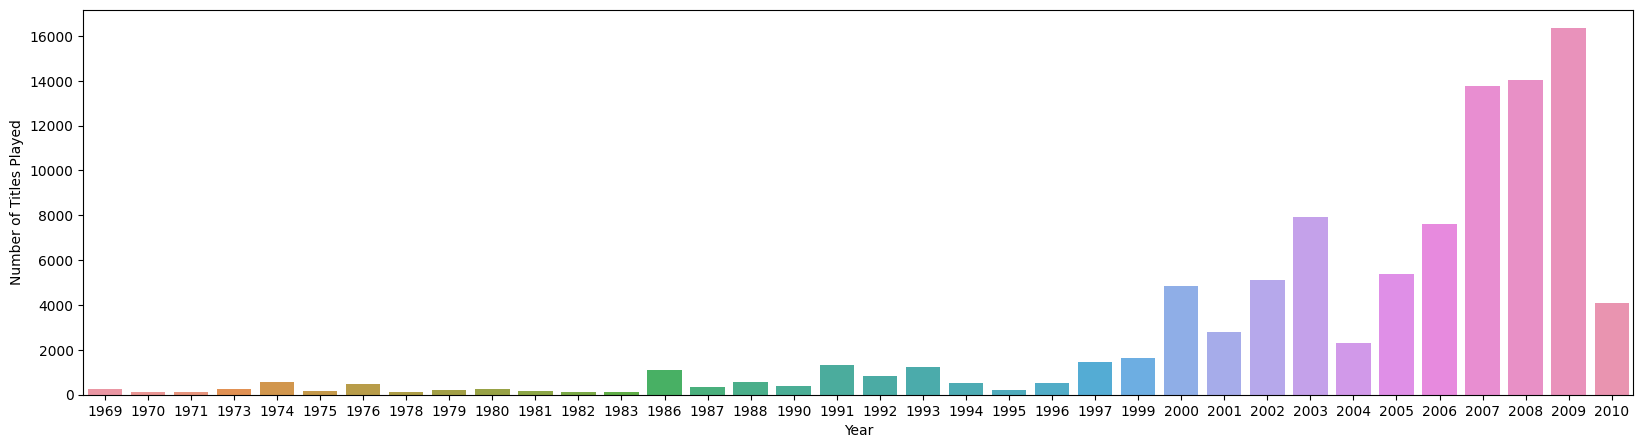

In [25]:
plt.figure(figsize = (20,5))
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

plt.xlabel('Year')

plt.ylabel('Number of Titles Played')

plt.show()

Our chart shows us that the most popular songs being played are from the year 2000-2010. There also appears to be a fair number of plays by users listening to mid-70s, late-80s, and 90s music.

The most popular songs are those from within the last couple of decades.

**Now that we have explored the data, let's apply different algorithms to build recommendation systems.**

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [26]:
# Calculating average play_count
avg_play_count = df_final.groupby(['song_id']).mean()['play_count']

# Calculating the frequency a song is played
play_frequency = df_final.groupby(['song_id']).count()['play_count']

In [27]:
# Making a dataframe with the average_count and play_freq
df_plays = pd.DataFrame({'avg_count': avg_play_count, 'plays': play_frequency})
df_plays.head()

,avg_count,plays
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [28]:
# Building the function to find top n songs
def top_songs(data, n, min_interaction = 50):
    recommendations = data[data['plays'] > min_interaction]
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)
    return recommendations.index[:n]

In [29]:
# Recommending top 10 songs using the function defined above
list(top_songs(df_plays, 10))

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [30]:
!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering


### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

We will compare using our F1 Score, as a combination of Precision and Recall, to create a strong recommendation system. We want to use a more general metric so that we can allow room for the system to make recommendations that users otherwise might not see.

In [32]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # Mapping the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sorting user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    print('Precision: ', precision)

    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

We are currently using a threshold of 1.5. Changing our threshold determines if an item will be relevant as a recommendation. With a threshold of 1.5, a rating above this value will be a legitimate recommendation. Below 1.5 and the system will not recommend it. A higher threshold will create a more strict/rigid recommendation system.

In [33]:
# Instantiating Reader scale with expected rating scale 
 #using rating scale (0, 5)
reader = Reader(rating_scale=(0,5))

# Loading the dataset
 # Taking only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Taking test_size = 0.4
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)

A larger test size reduces the size of the training set for our model. A smaller training set will inhibit the effectiveness of our recommendation system.

In [34]:
# Building the default user-user-similarity model
similarity_options = {'name': 'cosine', 'user_based': True}

# KNN algorithm to find desired similar items
sim_user_user_model = KNNBasic(sim_options = similarity_options, Verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_model.fit(trainset)

# Computing precision@k, recall@k, and f_1 score with k = 30
 # Using sim_user_user model
precision_recall_at_k(sim_user_user_model)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


Based on our initial user-user model (K-Nearest Neighbors with cosine similarity, & precision recall at k = 30), Our Precision shows us that ~40% of recommendations we make with this model are relevant. Our Recall shows us that ~70% of our relevant items appear in our k results.

In [35]:
# Predicting play_count for a sample user with a listened song
sim_user_user_model.predict(uid = 6958, iid = 1050, r_ui = 5, verbose = True)

user: 6958       item: 1050       r_ui = 5.00   est = 1.87   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1050, r_ui=5, est=1.8664177398632005, details={'actual_k': 40, 'was_impossible': False})

In [36]:
df_final[df_final['song_id'] == 21].user_id.unique()

array([57932, 70811, 51415,  9097, 23297,  1210, 70128, 35737,   154,
       42453, 18623, 73981, 28267, 42649, 72805, 35633, 34894, 68614,
       26897, 51934, 43806, 31721, 27240, 53169, 32490, 60754, 65067,
       39055, 68038,  9190, 69334, 44790, 62297, 72482, 57152, 64038,
       42727, 11880, 52655, 69919, 34946, 12764, 68791, 46453,  1965,
       62831,  9200, 35374, 58127, 20797, 47081, 65507, 17321, 29597,
       19783, 65994, 11196,  2397, 62759, 32364, 29685,  3298, 30384,
       15733,  1612, 54177, 52394, 70808, 11780, 63017, 45793, 23705,
       48844,  8695, 73601, 35775, 70307, 42337, 69136, 26976, 59672,
         829, 46796, 49164, 58033, 20611, 37049, 28082, 45931, 47435,
       20522, 11561,  1041, 62336, 60303, 27536, 21512, 54427,  3124,
       31403,  7522, 18765, 18200, 66940, 69373, 47165, 60518, 70254,
       54861, 12362, 54565, 14213, 33276, 22992, 30787, 50154, 67980,
       41780, 36453, 52221,  4060, 15843, 58163, 14642, 15175, 75711,
       31484, 34931,

In [37]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user_model.predict(uid = 6958, iid = 21, verbose = True)

user: 6958       item: 21         r_ui = None   est = 1.95   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=21, r_ui=None, est=1.95, details={'actual_k': 40, 'was_impossible': False})

For our first user and known song with rating (plays) 5, the system predicted a rating of 1.87 (above our 1.5 threshold). Therefore, this item would be considered a valid recommendation.

For our same user with an un-observed song, the system would recommended song_id 21 as its estimated rating of 1.95 is above our threshold.

Now, let's try to tune the model and see if we can improve the model performance.

In [38]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30, 40], 'min_k': [3, 6, 9, 12],
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [True]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse', 'mae'], cv = 3, n_jobs = -1)

gs.fit(data)

# Best RMSE score
print('best score: ', gs.best_score['rmse'])
print('-'*50)

# Combination of parameters that gave the best RMSE score
print('best parameters: ', gs.best_params['rmse'])


best score:  1.0445713327197739
--------------------------------------------------
best parameters:  {'k': 40, 'min_k': 12, 'sim_options': {'name': 'pearson_baseline', 'user_based': True}}


In [39]:
# Training the best model found in above gridsearch
sim_options = {'name': 'pearson_baseline', 'user_based': True}

tuned_user_user = KNNBasic(k = 40, min_k = 12, sim_options = sim_options, measures = ['rmse', 'mae'])
tuned_user_user.fit(trainset)

precision_recall_at_k(tuned_user_user)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0503
Precision:  0.411
Recall:  0.742
F_1 score:  0.529


Our cross-validation gridsearch determined Pearson correlation to provide the best rmse scored. We are also using minimum k = 12 neighbors with a max of k = 40 for our aggregation. Our tuned user-user model resulted in higher Precision and Recall scores than our base model.

In [40]:
# Predicting the play count for a user who has listened to the song (user_id 6958, song_id 1671 and r_ui = 2)
tuned_user_user.predict(6958, 1671, 2)


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [41]:
# Predict the play count for a song that is not listened to by the user (user_id 6958)
tuned_user_user.predict(6958, 21)

Prediction(uid=6958, iid=21, r_ui=None, est=1.4742227801543624, details={'actual_k': 20, 'was_impossible': False})

Our first user will correctly be recommended song_id 1671. Our model predicted a rating of ~1.96 against the true value of 2.

Our same user would not be recommended song_id 21 based on our tuned user-user similarity model, despite the previous model scoring above the 1.5 threshold and recommending this song.

In [42]:
# Getting 5 nearest recommendations
tuned_user_user.get_neighbors(0, 5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [43]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended product ids
  recommendations = []
    
    # Creating an user item interactions matrix 
  user_item_int_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # Extracting those business ids which the user_id has not visited yet
  non_interacted_songs = user_item_int_matrix.loc[user_id][user_item_int_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
  for item_id in non_interacted_songs:

        # Predicting the ratings for those non visited restaurant ids by this user
    est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
    recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
  recommendations.sort(key = lambda x: x[1], reverse = True)

  return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [44]:
# Making top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, tuned_user_user)

In [45]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,5531,2.573284
1,317,2.463405
2,4954,2.406776
3,5943,2.405651
4,8635,2.396606


For user_id 6958 the above 5 songs will be recommended.

### Correcting the play_counts and Ranking the above songs

In [46]:
def ranking_songs(recommendations, final_rating):
  # Sorting the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('plays', ascending = False)[['plays']].reset_index()
  
  # Merging with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Ranking the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['plays'])

  # Sorting the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)

  return ranked_songs

In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted to narrow our results. We could add 1/np.sqrt(n) to return more broad results as our actual play count could be quite significant.

In [47]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, df_plays)

,song_id,plays,predicted_ratings,corrected_ratings
0,5531,618,2.573284,2.533058
2,317,411,2.463405,2.414079
1,5943,423,2.405651,2.357030
3,4954,183,2.406776,2.332854
4,8635,155,2.396606,2.316284


Our corrected ratings are more modest than our predictions as a result of using (- 1/np.sqrt(n)).

### Item Item Similarity-based collaborative filtering recommendation systems 

In [48]:
# Applying the item-item similarity collaborative filtering model and evaluating performance
sim_options = {'name': 'cosine', 'user_based': False}

sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1)

sim_item_item.fit(trainset)


precision_recall_at_k(sim_item_item)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


Our initial simlarity-based item-item model is getting significantly lower precision and recall scores than our tuned user-user model. Based on our precision score, only ~30% of relevant items are being recommended. And based on our recall score, over 50% of recommended items are relevant. Our tuned user-user model had an F1 score of .529. Our initial item-item model's F1 score is .397. Tuning hyperparameters will likely increase our precision, recall, & F1 score for this model.

In [49]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(uid = 6958, iid = 1671, r_ui = 2)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [50]:
df_final[df_final['user_id'] == 57932].song_id.unique()

array([  21,   52,   93,   97,  310,  317,  352,  605,  733,  736,  750,
        965, 1118, 1217, 1223, 1281, 1286, 1354, 1407, 1816, 1828, 2048,
       2091, 2210, 2220, 2403, 2500, 2610, 2616, 2657, 2672, 2686, 2734,
       2960, 3181, 3310, 3346, 3429, 3567, 3870, 4231, 4289, 4301, 4399,
       4448, 4554, 4564, 4639, 4727, 4973, 5138, 5273, 5291, 5367, 5375,
       5531, 5607, 5653, 5697, 5879, 5943, 6175, 6189, 6226, 6293, 6339,
       6525, 6587, 7103, 7212, 7343, 7470, 7576, 7780, 7881, 7911, 7969,
       7980, 7998, 8029, 8034, 8092, 8247, 8481, 8577, 8612, 8698, 8866,
       9139, 9262, 9387, 9487, 9931])

In [51]:
# Predicting the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(uid = 57932, iid = 1671)

Prediction(uid=57932, iid=1671, r_ui=None, est=1.9827832879564486, details={'actual_k': 40, 'was_impossible': False})

Currently, our item-item model would not recommend song_id 1671 to user 6958. It returned a prediction of 1.36, against the actual value of 2, and is below the 1.5 threshold.

Our user 57932 who has not listened to song 1671 would indeed have this song recommended to them.

In [52]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [False]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse', 'mae'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0235730725321666
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


Again, Pearson baseline provides us with the best result with a default shrinkage of 100 to help avoid overfitting. Our grid search returned a max k of 30 nearest neighbors with a minimum of 6.

In [53]:
# Applying the best model found in the grid search
sim_options = {'name': 'pearson_baseline', 'user_based': False}
tuned_item_item = KNNBasic(k = 30, min_k = 6, sim_options = sim_options, measures = 'rmse', random_state = 1)

tuned_item_item.fit(trainset)

precision_recall_at_k(tuned_item_item)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


We have made a decent improvement to our model through tuning our hyperparameters. Our precision increased from ~30% to ~40%, recall increased from ~56% to ~66% and F1 score improved from ~.4 to ~.5 with our tuned item-item model using similarity-based matrix.

In [54]:
# Predicting the play_count by a user (user_id 6958) for the song (song_id 1671)
tuned_item_item.predict(uid = 6958, iid = 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [55]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
tuned_item_item.predict(uid = 6958, iid = 3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

Our tuned item-item model would correctly recommend song 1671 to user 6958.

Our tuned item-item model would not recommend the unheard song 3232 to user 6958.

In [56]:
# Finding five most similar items to the item with inner id 0
tuned_item_item.get_neighbors(0, 5)

[124, 523, 173, 205, 65]

In [57]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, tuned_item_item)

In [58]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [59]:
# Applying the ranking_songs function
ranking_songs(recommendations, df_plays)

,song_id,plays,predicted_ratings,corrected_ratings
4,2342,111,2.653903,2.558987
2,5101,130,2.386577,2.298871
3,139,119,2.313727,2.222057
1,7519,168,2.270864,2.193712
0,8099,275,2.212702,2.152399


Our top recommendations are shown above. Song_id 2342 would be the top recommended song for user 6958.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [60]:
# Building baseline model using svd
svd = SVD(random_state = 1)

svd.fit(trainset)

precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [61]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671) with r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [62]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [63]:
# Setting the parameter space to tune
param_grid = {'n_factors':[50,100,150],'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0108931505686485
{'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


In [64]:
# Building the optimized SVD model using optimal hyperparameters
tuned_svd = SVD(n_factors = 150, n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

tuned_svd.fit(trainset)

precision_recall_at_k(tuned_svd)

RMSE: 1.0131
Precision:  0.411
Recall:  0.635
F_1 score:  0.499


Even after tuning the hyperparameters of our model, its performance virtually remains the same as the base model.

In [65]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
tuned_svd.predict(6958, 1671, r_ui = 2)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.3584207122206506, details={'was_impossible': False})

In [66]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
tuned_svd.predict(6958, 3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.443318849014458, details={'was_impossible': False})

Our tuned svd model would not recommend either song for user 6958. For song 1671, our current svd model fails to predict a rating high enough to recommend this song to the user despite its actual rating of 2.

In [67]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, tuned_svd)
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])


,song_id,predicted_ratings
0,7224,2.629106
1,4831,2.055205
2,5653,2.054323
3,9942,2.022290
4,614,1.961623


In [68]:
# Ranking songs based on above recommendations
ranking_songs(recommendations, df_plays)

,song_id,plays,predicted_ratings,corrected_ratings
3,7224,107,2.629106,2.532433
2,5653,108,2.054323,1.958098
4,4831,97,2.055205,1.953670
1,9942,150,2.022290,1.940640
0,614,373,1.961623,1.909845


Again, our corrected ratings are slightly more modest.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [69]:
# Making baseline clustering model
clust_model = CoClustering(random_state = 1)

clust_model.fit(trainset)

precision_recall_at_k(clust_model)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [70]:
# Making prediction for user_id 6958 and song_id 1671
clust_model.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [71]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_model.predict(6958, 3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [72]:
# Setting the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6, 7, 8], 'n_cltr_i': [3, 4, 5, 6, 7, 8], 'n_epochs': [10, 20, 30, 40, 50]}


# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0455722517264
{'n_cltr_u': 3, 'n_cltr_i': 4, 'n_epochs': 10}


In [73]:
# Training the tuned Coclustering algorithm
tuned_cc = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 10, random_state = 1)

tuned_cc.fit(trainset)

precision_recall_at_k(tuned_cc)


RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


Our tuned co-clustering model's scoring is identical to our baseline model. Our hyperparameter tuning determined the optimal clusters for users and items were each 3. It seems our current grid of hyperparemeters are not effective in making improvements over our base co-clustering model.

In [74]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
tuned_cc.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.31   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.30740665213302, details={'was_impossible': False})

In [75]:
# Using Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
tuned_cc.predict(6958, 3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.4917500864764544, details={'was_impossible': False})

Song 1671 would incorrectly fail to be recommended to user 6958. Song 3232 would fail to be recommended to user 6958.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [76]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clust_recommendations = get_recommendations(df_final, 6958, 5, tuned_cc)

### Correcting the play_count and Ranking the above songs

In [77]:
# Ranking songs based on the above recommendations
ranking_songs(clust_recommendations, df_plays)

,song_id,plays,predicted_ratings,corrected_ratings
2,7224,107,3.108021,3.011348
4,8324,96,2.324723,2.222661
1,9942,150,2.228264,2.146614
0,5531,618,2.137787,2.097561
3,4831,97,2.137007,2.035472


Our co-clustering model ranks song 7224 highest with a predicted rating of 3.1. These are the highest predicted/corrected ratings we've seen from previously used models.

### Content Based Recommendation Systems

So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Let us take some of those features into account.

In [78]:
content_df = df_final

In [79]:
content_df['year'] = content_df['year'].astype(str)

In [80]:
# Concatenating "title", "release", "artist_name" columns to create a different column named "text"
content_df['text'] = content_df['title'] + ' ' + content_df['release'] + ' ' + content_df['artist_name'] + ' ' + content_df['year']
content_df.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown 2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers ...
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse ...


In [81]:
# Selecting the columns 'user_id', 'song_id', 'play_count', 'title', 'text' 
content_df = content_df[['user_id', 'song_id', 'play_count', 'title', 'text']]
# Dropping the duplicates from the title column
content_df = content_df.drop_duplicates(subset = ['title'])
# Setting the title column as the index
content_df = content_df.set_index('title')
# Seeing the first 5 records of the dataset
content_df.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown 2000
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers ...
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse ...


In [82]:
# Creating the series of indices from the data
indices = pd.Series(content_df.index)
indices[:5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [83]:
# Importing necessary packages to work with text data
import nltk
nltk.download('omw-1.4')

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet 
nltk.download('wordnet') 

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [84]:
# Creating a function to tokenize the text
def tokenizer(text):
  text = re.sub(r'[a-zA-Z]', ' ', text.lower())

    # Tokenizing the text using word_tokenize from nltk
  tokens = word_tokenize(text)

    # Converting tokens to lowercase
  tokens = [token.lower() for token in tokens]

    # Removing stopwords
  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words]

    # Lemmatizing tokens
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  return tokens

In [85]:
# Creating tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenizer)

# Fit_transforming the above vectorizer on the text column and then converting the output into an array
song_tfidf = tfidf.fit_transform(content_df['text'].values).toarray()

In [86]:
# Computing the cosine similarity for the tfidf above output
cos_sim = cosine_similarity(song_tfidf, song_tfidf)
cos_sim


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [87]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
  recommended = []
    
    # Getting the index of the song that matches the title
  song_index = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
  sim_scores = pd.Series(cos_sim[song_index]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
  top_10 = list(sim_scores.iloc[:10].index)
  print(top_10) 

    # Populating the list with the titles of the best 10 matching songs
  for i in top_10:
        recommended.append(list(content_df.index)[i]) 
        
  return recommended

Recommending 10 songs similar to Learn to Fly

In [88]:
# Making the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', cos_sim)

[351, 508, 402, 227, 533, 437, 102, 54, 378, 377]


['Luvstruck',
 'Drive',
 'Learn To Fly',
 'My Name Is',
 'Creil City',
 'Représente',
 "Don't Panic",
 'Brothers & Sisters',
 'Hearts On Fire',
 'Out There On The Ice']

In [89]:
content_df.iloc[402]

user_id                                                   75901
song_id                                                    1188
play_count                                                    2
text          Learn To Fly There Is Nothing Left To Lose Foo...
Name: Learn To Fly, dtype: object

Our content-based recommendation system seems to have accurately returned results related to the Indie, Rock, and broad 90s genres of music. This accurately reflects that the majority of our dataset makes up a high number of plays from songs released within the last 20-30 years.

## **Conclusion and Recommendations**

**1. Models & F1 Scores:**


**User-User Similarity-Based Collaborative Filtering:**

    Precision: base [.396] optimized [.411]
       Recall: base [.692] optimized [.742]
     F1 Score: base [.504] optimized [.529]

**Item-Item Similarity-Based Collaborative Filtering:**

    Precision: base [.307] optimized [.408]
       Recall: base [.562] optimized [.665]
     F1 Score: base [.397] optimized [.506]

**Matrix Factorization Model-Based Collaborative Filtering:**

    Precision: base [.41] optimized [.411]
       Recall: base [.633] optimized [.635]
     F1 Score: base [.498] optimized [.499]


**Clustering-Based System Using Co-Clusters**

    Precision: base [.397] optimized [.397]
       Recall: base [.582] optimized [.582]
     F1 Score: base [.472] optimized [.472]


**Content-Based System**  

      Scoring: N/A


Of the models and hyperparameters used, our optimized User-User Model performed the best. We achieved higher precision, recall, and F1 scores at k = 30 than than other models. It is not a significant victory. Further tuning of hyperparameters could help us achieve better results. The system would also benefit from hybrid architecture.

**2. Refined insights**:

A larger dataset and more features would be helpful in improvement our recommendation system (Ex. data on genres, user demographics, etc.). More data would help us better identify users, songs, and find more similarities thus providing better recommendations.

With the current dataset and models we see that the most effective method is computing similarity of users based on number of plays for shared songs.

**3. Proposal for the final solution design:** 

The current recommendation is to use a User-User Similarity-Based Collaborative Filtering model. With this model we acheived good Recall and relatively decent Precision.

With a Recall of .742, ~74% of the total number of relevant items will be recommended to the user.

With a Precision of .411, of the items recommended to a user ~41% will be relevant.

This is currently the model with the best Precision, Recall, and F1 Score.